### 1. 문제정의
- iris 데이터에 scaler를 사용해보자

#### 2. 데이터 수집
- iris 사용

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### 3. 데이터 전처리
- 데이터 구조 확인

In [4]:
x = iris.data
y = iris.target

In [5]:
print(len(x))
print(len(y))

150
150


In [6]:
print('데이터셋 크기 : ', iris['data'].shape)
print('데이터셋 크기 : ', iris['target'].shape)

데이터셋 크기 :  (150, 4)
데이터셋 크기 :  (150,)


In [7]:
#데이터프레임 형태로 변환
df = pd.DataFrame(x, columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [8]:
df.columns = ['sepal length', 'sepal width', 'petal length','petal width']
df.head()

sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

### scaler 적용

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [10]:
#스케일러 모델링
#학습
#데이터 변환

In [11]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=1234)
scaler = StandardScaler()
scaler.fit(x_train)
x_scaler = scaler.transform(x_train)
print('스케일 조정 전 min value : ', x_train.min(axis=0))
print('스케일 조정 전 max value : ', x_train.max(axis=0))
print('스케일 조정 후 min value : ', x_scaler.min(axis=0))
print('스케일 조정 후 max value : ', x_scaler.max(axis=0))

스케일 조정 전 min value :  [4.3 2.  1.  0.1]
스케일 조정 전 max value :  [7.9 4.4 6.9 2.5]
스케일 조정 후 min value :  [-1.91393822 -2.30367962 -1.5790327  -1.45460643]
스케일 조정 후 max value :  [2.51094647 2.90430257 1.77279772 1.66091714]


In [12]:
scaler = StandardScaler()
scaler.fit(df)
x_scaled = scaler.transform(df)
#학습과 변환 동시에
#x_scaled = scaler.fit_transform(df)

In [13]:
scale_df = pd.DataFrame(x_scaled, columns=iris.feature_names)
scale_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444

### 4. EDA(탐색적 분석) - 시각화 등등

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

<AxesSubplot:>

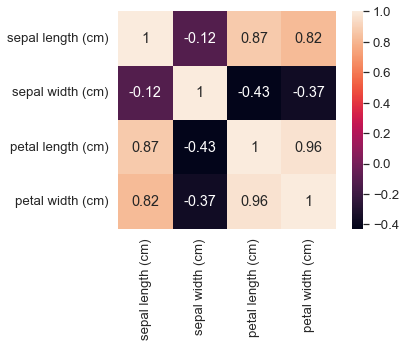

In [15]:
sns.heatmap(data=scale_df.corr(), square=True, annot=True)

### 5-7.모델링(모델선택, 모델학습, 모델평가)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(scale_df, y,
                                                    shuffle=True,
                                                    random_state=0)

#### KNN, DT, SVM, 로지스틱 회귀

### KNN
- KNN분류 알고리즘은 예측하려는 데이터(x)가 주어지면, 기전 데이터 중 속성이 비슷한 k개의 이웃을 먼저 찾는 알고리즘
- X 데이터에 가까이 있는 K개의 이웃을 찾고, 이 이웃데이터 중에 가장 많이 속해있는 label으로 예측값을 결정하는 알고리즘
- K값에 따라 모델의 예측력이 달라지기 때문에 적절한 K개수를 정해줘야함

In [18]:
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph
#모델정의 - 하이퍼파라미터(n_neighbors=)
knn = KNeighborsClassifier(n_neighbors=5)
#학습
knn.fit(x_train, y_train)
#예측
predict = knn.predict(x_test)
#평가
knn.score(x_test, y_test)

0.9736842105263158

In [19]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predict)
acc

0.9736842105263158

### Logistic Regression
- 이름은 회귀지만 분류를 알고리즘
- 시그모이드 함수출력값(0-1사이)을 각 분류 클래스에 속하게 될 확률값으로 사용
- 확률값이 1에 가까우면 해당 클래스로 분류를 하고, 0에 가까우면 아니라고 분류를 함

In [28]:
from sklearn.linear_model import LogisticRegression
#모델 생성
logi = LogisticRegression()
# 모델 학습
logi.fit(x_train, y_train)
#모델 예측
predict = logi.predict(x_test)
#모델 평가
print(logi.score(x_test, y_test))
print(accuracy_score(y_test, predict))

0.9736842105263158
0.9736842105263158


In [29]:
# predict_proba를 사용하면 각 클래스에 속할 확률값을 예측할 수 있다.
prob = logi.predict_log_proba(x_test)
prob

array([[-8.96504595e+00, -3.53269217e+00, -2.97933754e-02],
       [-5.16286589e+00, -4.70827246e-02, -3.21224144e+00],
       [-4.20951033e-03, -5.47252521e+00, -1.67833097e+01],
       [-1.07393958e+01, -2.53099573e+00, -8.29484579e-02],
       [-2.35910243e-02, -3.75868818e+00, -1.42825152e+01],
       [-1.03063476e+01, -4.67371473e+00, -9.41512241e-03],
       [-1.63654703e-02, -4.12078191e+00, -1.45792376e+01],
       [-5.04687677e+00, -3.27604541e-01, -1.29856679e+00],
       [-6.15061162e+00, -3.09365141e-01, -1.33197633e+00],
       [-3.83482180e+00, -1.07069201e-01, -2.52658757e+00],
       [-6.66235119e+00, -8.21707788e-01, -5.81531157e-01],
       [-3.92594124e+00, -2.64106818e-01, -1.54935496e+00],
       [-4.34438098e+00, -1.51815667e-01, -2.05671125e+00],
       [-5.58829782e+00, -3.57998786e-01, -1.21340150e+00],
       [-4.39575571e+00, -2.82225034e-01, -1.45428855e+00],
       [-8.37742408e-03, -4.78641419e+00, -1.59914244e+01],
       [-4.20224521e+00, -3.22573133e-01

### Decision Tree

- 의사결정나무 모델은 트리 알고리즘을 사용
- 트리의 각 분기점(node)에는 데이터셋의 피처를 하나씩 위치시킴
- 각 노드마다 해당 피처에 관해서 임의의 조건식을 가지고 계속 2개 이상의 줄기로 가지를 나누면서 데이터를 구분
- 이때, 각 분기점에서 분류가 가장 잘되는 최적의 기준을 찾는 과정이 중요
- 하이퍼파라미터 많음 -> 과대적합을 방지 필요

In [31]:
from sklearn.tree import DecisionTreeClassifier
#모델 생성
dt = DecisionTreeClassifier()
#모델 학습
dt.fit(x_train, y_train)
#모델 예측
predict = dt.predict(x_test)
#모델 평가
print(dt.score(x_test, y_test))
print(accuracy_score(y_test, predict))

0.9736842105263158
0.9736842105263158


### SVM

- svm 알고리즘은 데이터셋의 각 피처(열) 벡터들이 고유의 축을 갖는 벡터 공간을이룬다고 가정
- 모든 데이터를 벡터 공간 내의 좌표에 점으로 표시하고, 각 데이터가 속하는 목표 클래스(label)별로 나뉜다고 생각을 하면됨
- hyper plane(초평면) : 데이터 차원 N차원을 가지고있으면, N - 1차원을 가지는 subspace 표현
- support vector : 각 클래스별로 최외각에 있는 벡터
- margin : 각 레이블들 사이의 여백
- C : 이상치 - hard margin / soft margin
- gamma : 결정경계의공률을 결정하는데 사용
- kernel : 'linear'-선형, 'poly'-다항식, 'rbf'-가우시안함수

In [34]:
from sklearn.svm import SVC

svc = SVC(kernel='linear') #'linear', 'poly', 'rbf'
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print(svc.score(x_test, y_test))
print(accuracy_score(y_test, pred))

0.9736842105263158
0.9736842105263158
